**Subject:** Appliead Data Science 1

**Assignment:** Clustering and Fitting (30%)

**Student Name:** M Waqas

Unzipping the Dataset and Loading the Dataset

In [22]:
import pandas as pd

# Dataset path
csv_path = '/content/CC GENERAL.csv'

# Loading the dataset
data = pd.read_csv(csv_path)

# Displaying basic dataset information
print("Dataset Information:")
print(data.info())

# first few rows
print("\nFirst Five Rows of the Dataset:")
print(data.head())

# basic statistics
print("\nStatistical Summary of Dataset:")
print(data.describe(include='all'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null 

Now Lets clean the Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(data):
    """
Preprocess the input dataset by performing the following: drop irrelevant or non-numeric columns, treat missing values by replacing them with column means, and normalize numeric features using Min-Max scaling.

    Args:
        data (pd.DataFrame): Raw dataset.

    Returns:
    pd.DataFrame: Preprocessed and normalized dataset.
    """
    # Droping non-numerical and irrelevant columns
    data_cleaned = data.drop(columns=['CUST_ID'])

    # Handle missing values by filling with mean
    data_cleaned.fillna(data_cleaned.mean(), inplace=True)

    # Normalizing the data using Min-Max scaling
    scaler = MinMaxScaler()
    data_normalized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

    return data_normalized

# Applying preprocessing
data_normalized = preprocess_data(data)

# Displaying processed dataset information and first few rows
print("Processed Dataset Information:")
print(data_normalized.info())
print("\nFirst Five Rows of Processed Dataset:")
print(data_normalized.head())

Processed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950

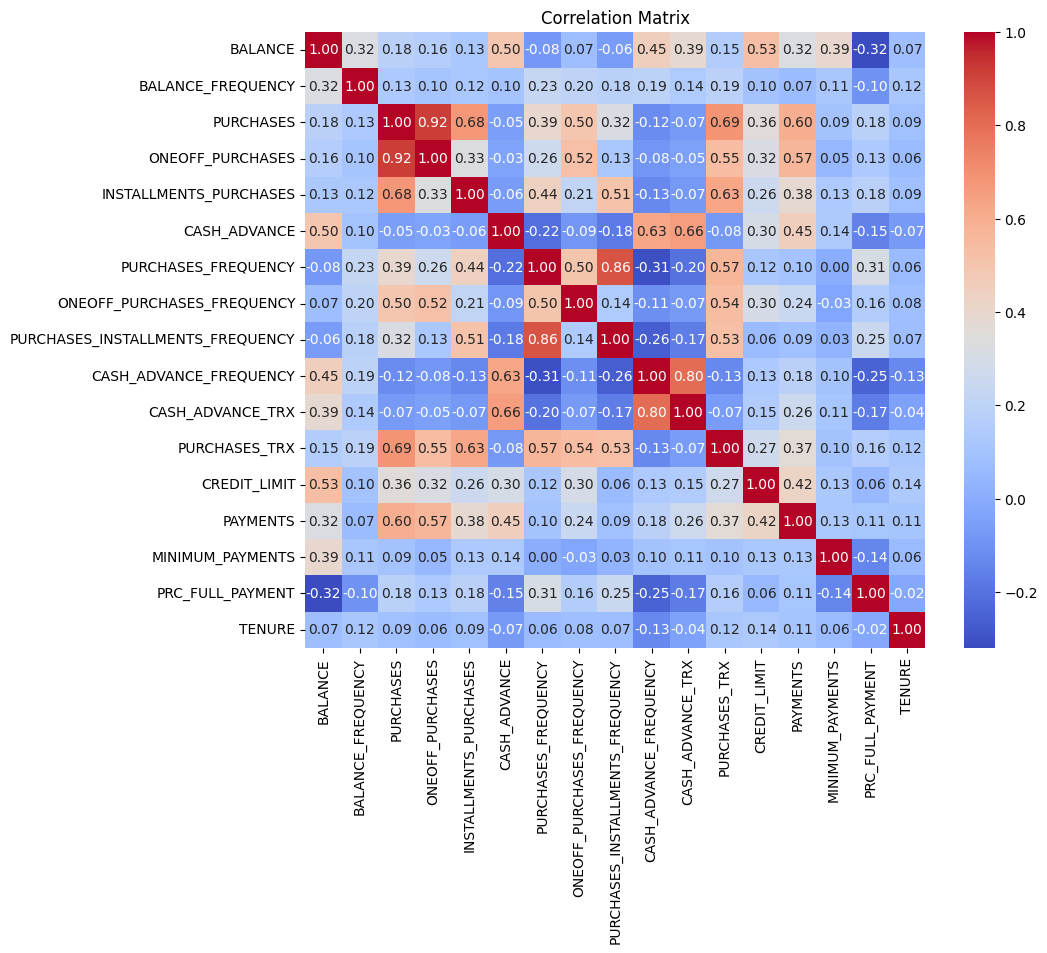

In [24]:
import seaborn as sns

def plot_correlation_matrix(data):
    """
    Plot a heatmap showing the correlation matrix of the dataset.

    Args:
        data (pd.DataFrame): Normalized dataset.

    Returns:
        None: Displays a heatmap of the correlation matrix.
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()

# Call the function to display the correlation matrix
plot_correlation_matrix(data_normalized)


Performing K Means

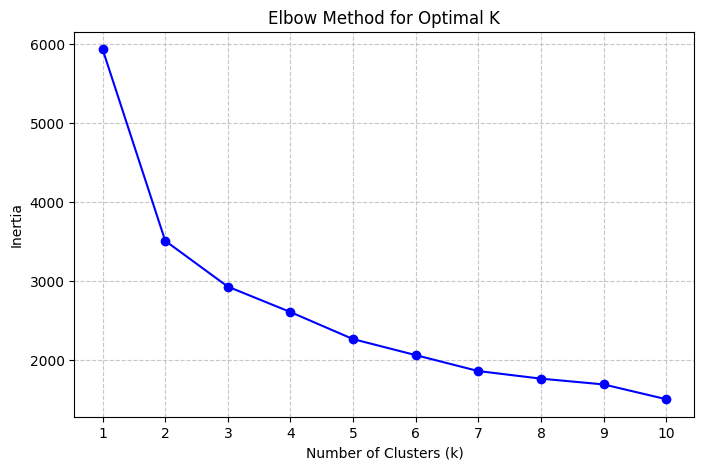

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(data, max_k=10):
    """
Elbow method to determine the optimum value of k for k-means.

    Args:
        data (pd.DataFrame): Normalised dataset to fit k-means.
        max_k (int): Maximum number of clusters to test (default is 10).

    Returns:
None: It only plots the elbow.
    """
    # Step 1: Firstly Calculating inertia for different cluster sizes
    inertia = []
    k_values = range(1, max_k + 1)  # Testing k from 1 to max_k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Step 2: Secondly Ploting the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia, marker='o', color='b')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# displaying the Elbow
plot_elbow_method(data_normalized)

Apply K-Means Clustering with k = 4

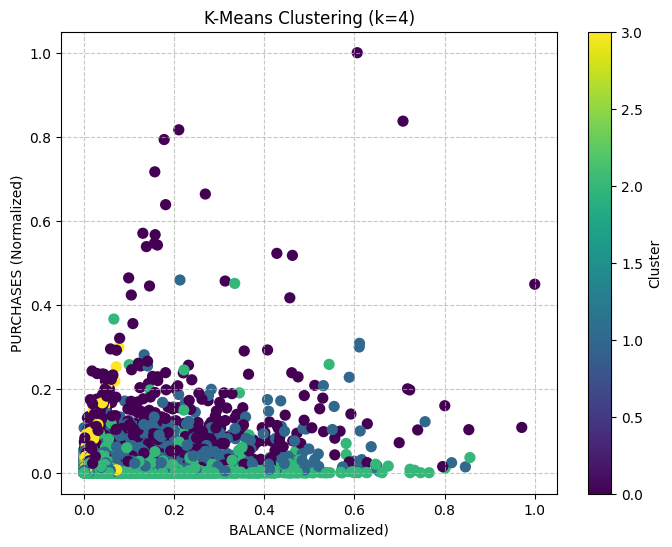

Cluster Centers (Normalized):
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.102272           0.979029   0.066065          0.060480   
1  0.081130           0.925216   0.023815          0.008942   
2  0.091977           0.838691   0.005779          0.005661   
3  0.005920           0.810822   0.022027          0.008078   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.034425      0.014217             0.900144   
1                0.035733      0.014684             0.878117   
2                0.002346      0.029413             0.136931   
3                0.033411      0.001000             0.752936   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.827593                          0.462023   
1                    0.128604                          0.826689   
2                    0.080776                          0.055332   
3                    0.113991                          0.662466  

In [26]:
def fit_kmeans_and_plot(data, n_clusters=4, feature_x='BALANCE', feature_y='PURCHASES'):
    """
    Fit k-means clustering with a specified number of clusters and visualize the clusters.

    Args:
        data (pd.DataFrame): Normalized dataset to fit k-means.
        n_clusters (int): Number of clusters for k-means (default is 4).
        feature_x (str): Feature to use for x-axis in the scatter plot.
        feature_y (str): Feature to use for y-axis in the scatter plot.

    Returns:
        pd.DataFrame: Cluster centers as a DataFrame.
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    # Step 1: Fit k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data)

    # Step 2: Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature_x], data[feature_y], c=data['Cluster'], cmap='viridis', s=50)
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.xlabel(f'{feature_x} (Normalized)')
    plt.ylabel(f'{feature_y} (Normalized)')
    plt.colorbar(label='Cluster')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Step 3: Display cluster centers
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-1])
    print("Cluster Centers (Normalized):")
    print(cluster_centers)

    return cluster_centers

# Call the function to fit and visualize clusters
cluster_centers = fit_kmeans_and_plot(data_normalized, n_clusters=4)

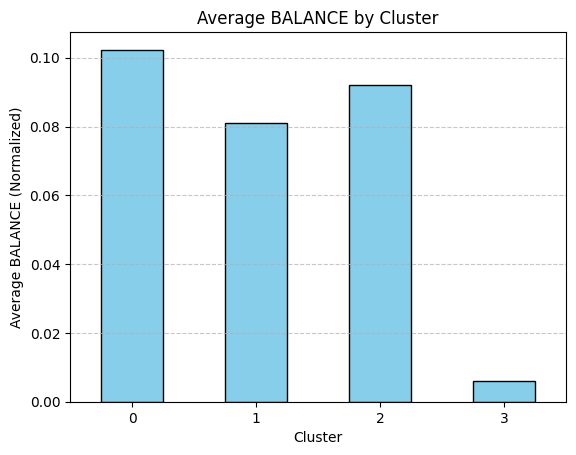

In [28]:
def plot_average_balance_by_cluster(data):
    """
    Plot a bar chart showing the average BALANCE by cluster.

    Args:
        data (pd.DataFrame): Dataset containing cluster assignments and features.

    Returns:
        None: Displays a bar chart.
    """
    average_balance = data.groupby('Cluster')['BALANCE'].mean()
    average_balance.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average BALANCE by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average BALANCE (Normalized)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the function after clustering
plot_average_balance_by_cluster(data_normalized)


Line Fitting (Regression)

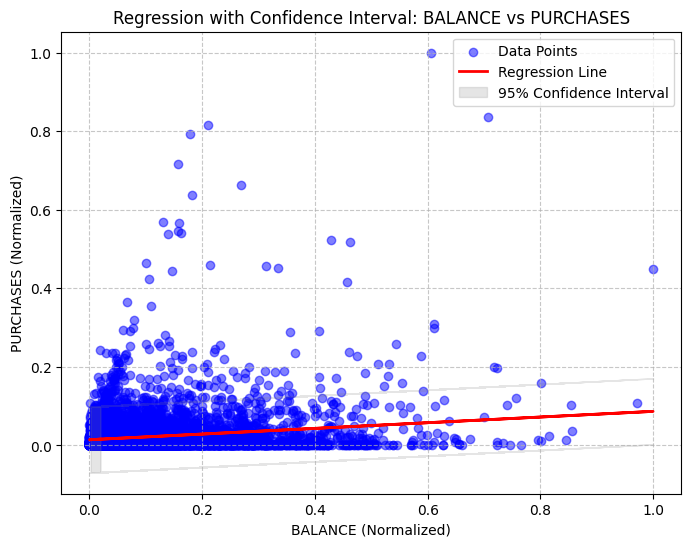

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_regression_with_confidence(data, feature_x='BALANCE', feature_y='PURCHASES'):
    """
    Perform linear regression and plot with confidence intervals.

    Args:
        data (pd.DataFrame): Normalized dataset.
        feature_x (str): Independent variable.
        feature_y (str): Dependent variable.

    Returns:
        None: Displays a scatter plot with regression line and confidence intervals.
    """
    X = data[feature_x].values.reshape(-1, 1)
    y = data[feature_y].values

    # Perform Linear Regression
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Calculate standard deviation of residuals
    residuals = y - y_pred
    std_error = np.std(residuals)

    # Calculate confidence intervals (95%)
    ci_upper = y_pred + 1.96 * std_error
    ci_lower = y_pred - 1.96 * std_error

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.fill_between(X.flatten(), ci_lower, ci_upper, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.title(f'Regression with Confidence Interval: {feature_x} vs {feature_y}')
    plt.xlabel(f'{feature_x} (Normalized)')
    plt.ylabel(f'{feature_y} (Normalized)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Call the function
plot_regression_with_confidence(data_normalized, feature_x='BALANCE', feature_y='PURCHASES')
